In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
#recuperer notre fichier dans une variable
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


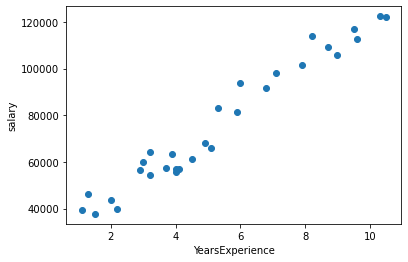

In [50]:
#dessiner le nuage de points du salaire en fonction des annees d'experience
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.show()

In [51]:

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 1/3,random_state=0)

# Linear regression

In [53]:
#definir le model

In [54]:
LR = LinearRegression()

In [55]:
#entrainer le model
LR.fit(X_train,Y_train)

LinearRegression()

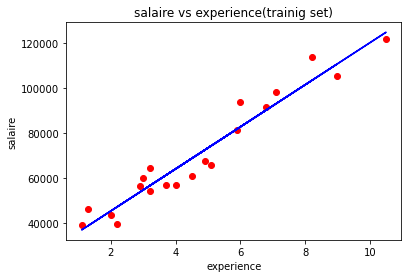

In [56]:
#le nuage de points des variables d'entrainement
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,LR.predict(X_train),color = 'blue')
plt.title('salaire vs experience(trainig set)')
plt.xlabel('experience')
plt.ylabel('salaire')
plt.show()

In [57]:
#tester le model
Y_pred_LR = LR.predict(X_test)

In [58]:
Y_pred_LR

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [59]:
#la difference entre l'original et le test
diff_LR = Y_test - Y_pred_LR

In [60]:
res_df = pd.concat([pd.Series(Y_pred_LR),pd.Series(Y_test),pd.Series(diff_LR)],axis = 1)
res_df.columns=['prediction','original','deffrence']

In [61]:
res_df

,prediction,original,deffrence
0,40835.105909,37731.0,-3104.105909
1,123079.399408,122391.0,-688.399408
2,65134.556261,57081.0,-8053.556261
3,63265.367772,63218.0,-47.367772
4,115602.645454,116969.0,1366.354546
5,108125.891499,109431.0,1305.108501
6,116537.239698,112635.0,-3902.239698
7,64199.962017,55794.0,-8405.962017
8,76349.687193,83088.0,6738.312807
9,100649.137545,101302.0,652.862455


In [62]:
#calculer la performance du model MSE
print(np.mean((diff_LR)**2))

21026037.329511296


In [63]:
#la performance du model en utilisant la grandeur de sklearn
print(mean_squared_error(Y_test,Y_pred_LR))

21026037.329511296


In [66]:
#predire le salaire en fonction d'annees
LR.predict([[30.1]])

array([308129.05978201])